# Obtención y preparación de los datos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('data/digit_train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
y_train = df.label.values
y_train

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

In [4]:
X_train = df.drop("label",axis=1)
X_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X_train = X_train.values
X_train = X_train / 255.0
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
X_train.shape

(42000, 784)

### Visualicemos un par de Números.

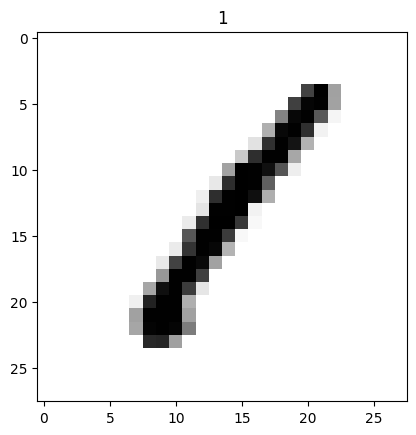

In [7]:
number = X_train[0].reshape(28,28)
plt.imshow(number, cmap=plt.cm.binary)
plt.title(y_train[0])
plt.show()

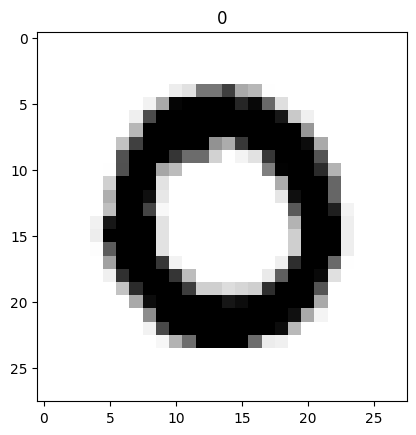

In [8]:
number = X_train[1].reshape(28,28)
plt.imshow(number, cmap=plt.cm.binary)
plt.title(y_train[1])
plt.show()

# Tensorflow y Keras
<b>Tensorflow: </b>https://www.tensorflow.org/
<br><b>Keras: </b>https://keras.io/

La siguiente celda, puede tardar un tiempo en que se ejecute por lo que se recomienda paciencia.

In [9]:
pip install tensorflow

  Using cached tensorflow-2.12.0-cp311-cp311-win_amd64.whl (1.9 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
from tensorflow import keras
from tensorflow.keras import layers

https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD

In [11]:
from tensorflow.keras.optimizers import SGD

### Diseño y Construcción de la Red Neuronal.

In [12]:
model = keras.Sequential([
    keras.layers.Dense(16, activation='sigmoid',input_shape=(784,)),
    keras.layers.Dense(16, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])

### Entrenamiento de la Red Neuronal.

La siguiente celda, puede tardar un tiempo en que se ejecute por lo que se recomienda paciencia.

In [13]:
sgd = SGD(lr = 0.1)
model.compile(optimizer = sgd, loss = 'sparse_categorical_crossentropy')
model.fit(X_train, y_train, epochs = 100, batch_size = 10)

Epoch 1/100
4200/4200 [==============================] - 3s 587us/step - loss: 2.1805
Epoch 2/100
4200/4200 [==============================] - 2s 587us/step - loss: 1.5453
Epoch 3/100
4200/4200 [==============================] - 2s 581us/step - loss: 1.0338
Epoch 4/100
4200/4200 [==============================] - 2s 584us/step - loss: 0.7907
Epoch 5/100
4200/4200 [==============================] - 3s 600us/step - loss: 0.6525
Epoch 6/100
4200/4200 [==============================] - 2s 586us/step - loss: 0.5530
Epoch 7/100
4200/4200 [==============================] - 2s 582us/step - loss: 0.4764
Epoch 8/100
4200/4200 [==============================] - 2s 582us/step - loss: 0.4228
Epoch 9/100
4200/4200 [==============================] - 2s 589us/step - loss: 0.3855
Epoch 10/100
4200/4200 [==============================] - 2s 574us/step - loss: 0.3576
Epoch 11/100
4200/4200 [==============================] - 2s 572us/step - loss: 0.3364
Epoch 12/100
4200/4200 [============================

4200/4200 [==============================] - 2s 571us/step - loss: 0.1045
Epoch 96/100
4200/4200 [==============================] - 2s 595us/step - loss: 0.1038
Epoch 97/100
4200/4200 [==============================] - 3s 616us/step - loss: 0.1033
Epoch 98/100
4200/4200 [==============================] - 3s 663us/step - loss: 0.1026
Epoch 99/100
4200/4200 [==============================] - 3s 598us/step - loss: 0.1019
Epoch 100/100
4200/4200 [==============================] - 3s 622us/step - loss: 0.1012


In [14]:
loss = model.evaluate(X_train, y_train)

print('Perdida:', loss)

1313/1313 [==============================] - 1s 559us/step - loss: 0.0978
Perdida: 0.09784659743309021


### Utilicemos la Red para Predecir sobre los datos ya conocidos.

In [15]:
predictions = model.predict(X_train)
predictions

1313/1313 [==============================] - 1s 498us/step


array([[8.28251632e-06, 9.92574573e-01, 5.47425821e-04, ...,
        1.78334847e-06, 6.00372208e-03, 4.14792839e-06],
       [9.98428226e-01, 2.96074104e-05, 2.06670287e-04, ...,
        1.06035301e-03, 1.53297563e-07, 4.74619810e-06],
       [4.50741254e-06, 9.99355972e-01, 6.83080070e-05, ...,
        3.31432500e-04, 1.23513237e-04, 4.23922174e-05],
       ...,
       [1.60232157e-05, 2.75341263e-05, 5.87454315e-06, ...,
        9.98563349e-01, 9.61306682e-07, 1.27045857e-03],
       [8.13363178e-04, 7.63003391e-06, 3.82010289e-03, ...,
        5.55331042e-07, 1.06321420e-06, 5.70085845e-08],
       [1.06591564e-04, 4.66914935e-05, 6.32296433e-05, ...,
        3.82941626e-02, 5.47774485e-04, 9.59634781e-01]], dtype=float32)

In [16]:
y_train_predict = []

for element in predictions:
    label = np.argmax(element)
    y_train_predict.append(label)
    
y_train_predict

[1,
 0,
 1,
 4,
 0,
 0,
 7,
 3,
 5,
 3,
 8,
 9,
 1,
 3,
 3,
 1,
 2,
 0,
 7,
 5,
 8,
 6,
 2,
 0,
 2,
 3,
 6,
 9,
 9,
 7,
 8,
 9,
 4,
 9,
 2,
 1,
 3,
 1,
 1,
 4,
 9,
 1,
 4,
 4,
 2,
 6,
 3,
 7,
 7,
 4,
 7,
 5,
 1,
 9,
 0,
 2,
 2,
 3,
 9,
 1,
 1,
 1,
 5,
 0,
 6,
 3,
 4,
 8,
 1,
 0,
 3,
 9,
 6,
 2,
 6,
 4,
 7,
 1,
 4,
 1,
 5,
 4,
 8,
 9,
 2,
 9,
 9,
 8,
 9,
 4,
 5,
 6,
 4,
 6,
 2,
 7,
 1,
 2,
 0,
 5,
 9,
 2,
 7,
 7,
 2,
 8,
 8,
 5,
 0,
 6,
 0,
 0,
 2,
 9,
 0,
 4,
 7,
 7,
 1,
 5,
 7,
 9,
 4,
 6,
 1,
 6,
 7,
 6,
 5,
 0,
 4,
 8,
 7,
 6,
 1,
 8,
 7,
 3,
 7,
 3,
 1,
 0,
 3,
 4,
 5,
 4,
 0,
 5,
 4,
 0,
 3,
 5,
 1,
 0,
 8,
 3,
 7,
 0,
 9,
 6,
 6,
 9,
 5,
 9,
 6,
 9,
 3,
 5,
 4,
 2,
 4,
 8,
 7,
 7,
 5,
 8,
 8,
 8,
 2,
 6,
 9,
 3,
 1,
 0,
 4,
 1,
 5,
 9,
 0,
 6,
 2,
 8,
 7,
 0,
 6,
 0,
 0,
 8,
 3,
 2,
 0,
 0,
 6,
 0,
 0,
 4,
 7,
 2,
 7,
 1,
 9,
 9,
 3,
 9,
 8,
 4,
 6,
 6,
 5,
 3,
 8,
 1,
 8,
 7,
 1,
 3,
 7,
 6,
 3,
 6,
 3,
 6,
 3,
 2,
 3,
 2,
 2,
 7,
 9,
 2,
 2,
 2,
 7,
 5,
 5,
 8,
 8,
 2,
 0,
 1,


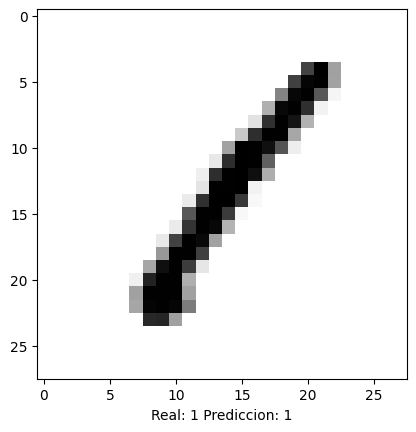

In [17]:
number = X_train[0].reshape(28,28)
plt.imshow(number, cmap=plt.cm.binary)
plt.xlabel("Real: {} Prediccion: {}".format
           (y_train[0],y_train_predict[0]))
plt.show()

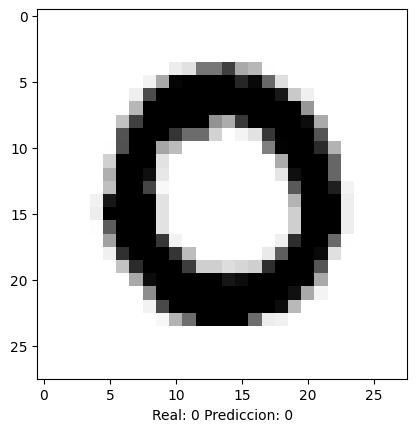

In [18]:
number = X_train[1].reshape(28,28)
plt.imshow(number, cmap=plt.cm.binary)
plt.xlabel("Real: {} Prediccion: {}".format
           (y_train[1],y_train_predict[1]))
plt.show()

### Matriz de confusión y reporte de clasificación.

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

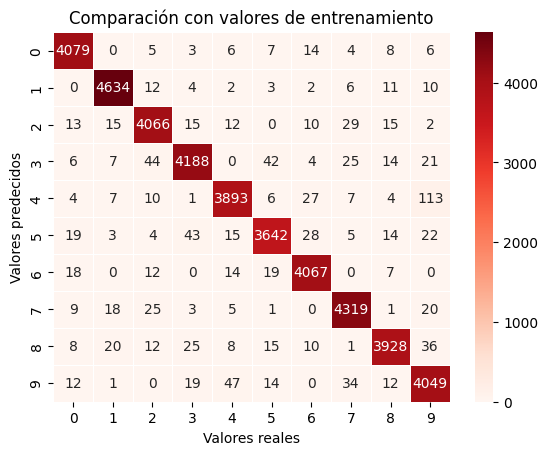

In [20]:
cm = confusion_matrix(y_train, y_train_predict)
sns.heatmap(cm, linewidth = 0.5, annot = True, cmap = 'Reds', fmt = 'g')

plt.ylabel('Valores predecidos')
plt.xlabel('Valores reales')
plt.title('Comparación con valores de entrenamiento')
plt.show()

In [21]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4132
           1       0.98      0.99      0.99      4684
           2       0.97      0.97      0.97      4177
           3       0.97      0.96      0.97      4351
           4       0.97      0.96      0.96      4072
           5       0.97      0.96      0.97      3795
           6       0.98      0.98      0.98      4137
           7       0.97      0.98      0.98      4401
           8       0.98      0.97      0.97      4063
           9       0.95      0.97      0.96      4188

    accuracy                           0.97     42000
   macro avg       0.97      0.97      0.97     42000
weighted avg       0.97      0.97      0.97     42000



In [22]:
model.save("my_model.h5")